# Inferring a Binomial Probability via Exact Mathematical Analysis

* [6.6. APPENDIX: R CODE FOR FIGURE 6.4](#6.6.-APPENDIX:-R-CODE-FOR-FIGURE-6.4)
* [Exercise 6.1](#Exercise-6.1)
* [Exercise 6.2](#Exercise-6.2)
* [Exercise 6.3](#Exercise-6.3)
* [Exercise 6.4](#Exercise-6.4)
* [Exercise 6.5](#Exercise-6.5)

## 6.6. APPENDIX: R CODE FOR FIGURE 6.4

Python version of `BernBeta.R`

In [1]:
import numpy as np
from scipy.stats import beta as betad
from scipy.special import beta, betaln

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from dbda2e_utils import HDIofGrid

In [2]:
def BernBeta(priorBetaAB, Data, HDImass=0.95):
    # priorBetaAB is two-element vector of beta a,b shape parameters
    # Data is vector of 0's and 1's.
    
    a, b = priorBetaAB
    
    # Create summary values of Data:
    z = sum(Data) # number of 1's in Data
    N = len(Data)
    
    Theta = np.linspace(0.001, 0.999, num=100)
    pTheta = betad.pdf(Theta, a ,b) # prior for plotting
    pTheta /= sum(pTheta) # Make pTheta sum to 1.0
    
    pThetaGivenData = betad.pdf(Theta, a+z, b+N-z) # posterior for plotting
    pThetaGivenData /= sum(pThetaGivenData)
    PosteriorBetaParams = (a+z, b+N-z)
    
    pDataGivenTheta = Theta**z * (1-Theta)**(N-z) # likelihood for plotting

    # Compute the evidence for optional display:
    #pData = beta(z+a,N-z+b) / beta(a,b)  # underflow errors for large a,b
    pData = np.exp(betaln(z+a, N-z+b) - betaln(a,b))
    
    f, axs = plt.subplots(3,1,figsize=(10,15))
    
    def annotate(Theta, Prob, ax, hdi=True):
        mode_text = 'mode = %.2f' % Theta[np.argmax(Prob)]
        ax.annotate(mode_text, xy=(0.85, 0.9), xycoords='axes fraction', fontsize=12)
        
        if not hdi:
            return

        # draw HDI
        HDIinfo = HDIofGrid(Prob , credMass=HDImass)
        hdi_x = Theta[HDIinfo['indices']]
        hdi_y = np.full_like(hdi_x, HDIinfo['height'])
        ax.plot(hdi_x, hdi_y, marker='.', color='k', ls='')
    
        ax.annotate('%.2f' % hdi_x[0], xy=(hdi_x[0], hdi_y[0]*1.1),
                    horizontalalignment='center', verticalalignment='bottom', fontsize=12)
        ax.annotate('%.2f' % hdi_x[-1], xy=(hdi_x[-1], hdi_y[-1]*1.1),
                    horizontalalignment='center', verticalalignment='bottom', fontsize=12)
    
        hdi_text = '%.0f%% HDI' % (HDImass * 100)
        hdi_mid_idx = len(hdi_x) // 2 
        ax.annotate(hdi_text, xy=(hdi_x[hdi_mid_idx], 1.3*hdi_y[hdi_mid_idx]),
                    horizontalalignment='center', verticalalignment='bottom', fontsize=12)

    
    # Plot the prior
    axs[0].vlines(Theta, 0, pTheta, color='cornflowerblue', linewidth=2)
    axs[0].set_title('Prior (beta)')
    axs[0].set_xlabel(r'$\theta$')
    axs[0].set_ylabel(r'$dbeta(\theta|%.1f, %.1f$)' % (a, b))
    annotate(Theta, pTheta, axs[0])
    
    # Plot the likelihood: p(Data|Theta)
    axs[1].vlines(Theta, 0, pDataGivenTheta, color='cornflowerblue', linewidth=2)
    axs[1].set_title('Likelihood (Bernoulli)')
    axs[1].set_xlabel(r'$\theta$')
    axs[1].set_ylabel(r'$p(D|\theta$)')
    data_text = 'Data: z = %d, N = %d' % (z, N)
    axs[1].annotate(data_text, xy=(0.02, 0.9), xycoords='axes fraction', fontsize=12)    
    annotate(Theta, pDataGivenTheta, axs[1], hdi=False)
    
    # Plot the posterior: p(Theta|Data)
    axs[2].vlines(Theta, 0, pThetaGivenData, color='cornflowerblue', linewidth=2)
    axs[2].set_title('Posterior (beta)')
    axs[2].set_xlabel(r'$\theta$')
    axs[2].set_ylabel(r'$dbeta(\theta|%.1f, %.1f$)' % PosteriorBetaParams)
    annotate(Theta, pThetaGivenData, axs[2])

    plt.show()
    
    return PosteriorBetaParams

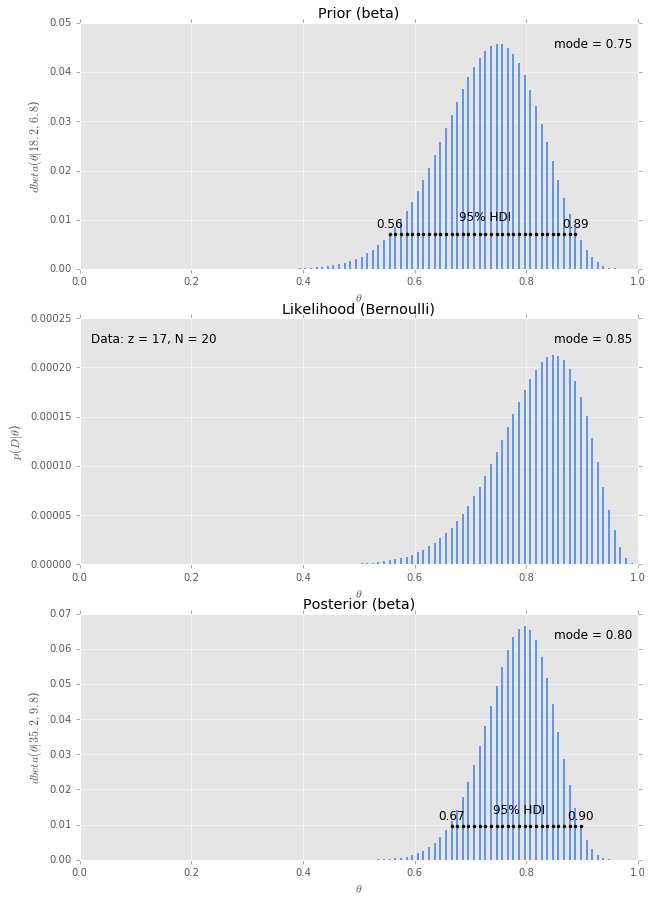

In [3]:
# Specify the prior:
t = 0.75    # Specify the prior mode.
n = 25      # Specify the effective prior sample size.

a = t*(n-2) + 1         # Convert to beta shape parameter a.
b = (1-t)*(n-2) + 1     # Convert to beta shape parameter b.
Prior = [a,b]           # Specify Prior as vector with the two shape parameters.

# Specify the data:
N = 20  # The total number of flips.
z = 17  # The number of heads.
Data = np.concatenate((np.repeat(0,N-z), np.repeat(1,z)))

_ = BernBeta(priorBetaAB=Prior, Data=Data)

## Exercise 6.1

**Purpose**: For you to see the influence of the prior in each successive flip, and for you to see another demonstration that the posterior is invariant under re-orderings of the data. 

### Part A

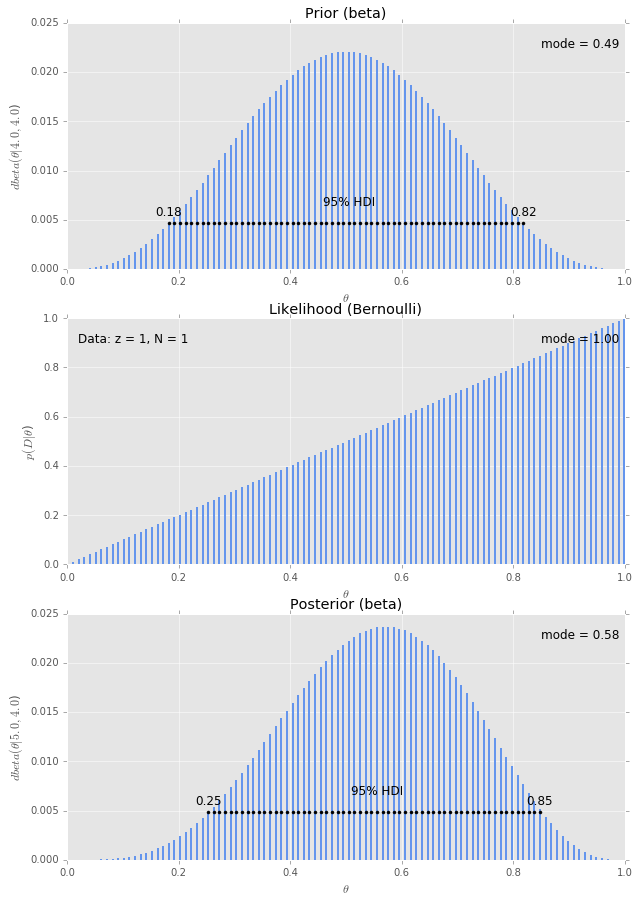

In [4]:
a = 4; b = 4

post = BernBeta(priorBetaAB=[a,b], Data=[1])

### Part B

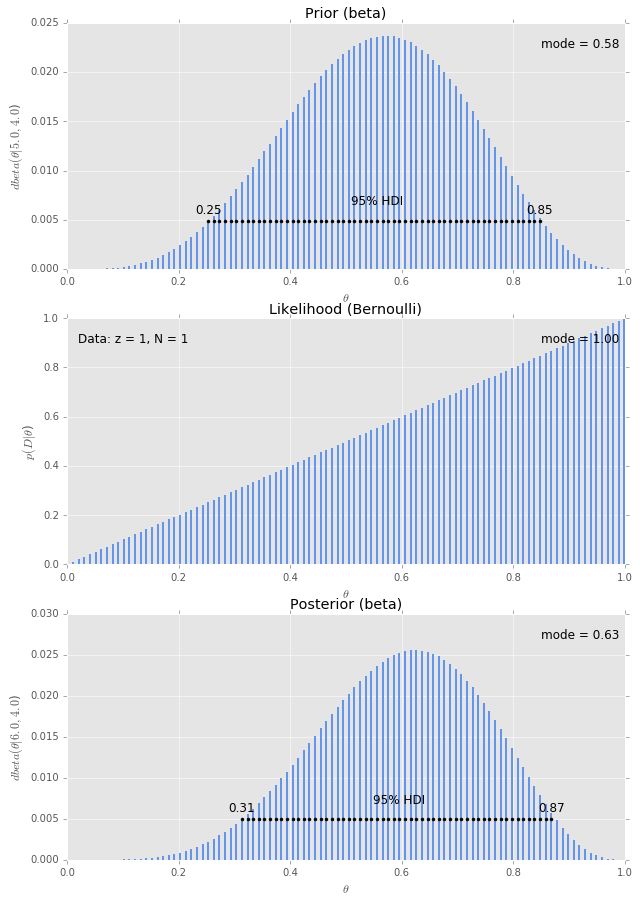

In [5]:
post = BernBeta(priorBetaAB=post, Data=[1])

### Part C

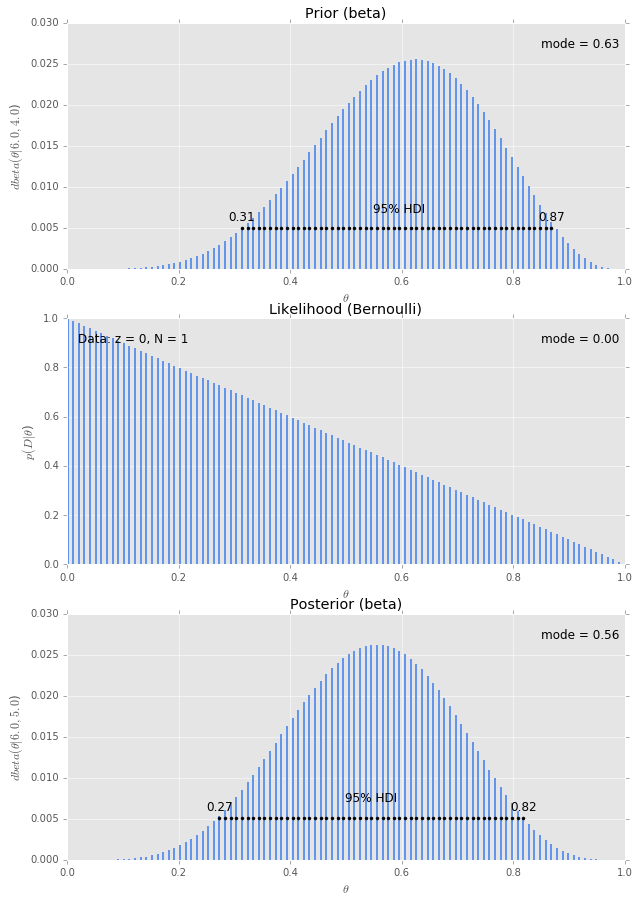

In [6]:
post = BernBeta(priorBetaAB=post, Data=[0])

### Part D

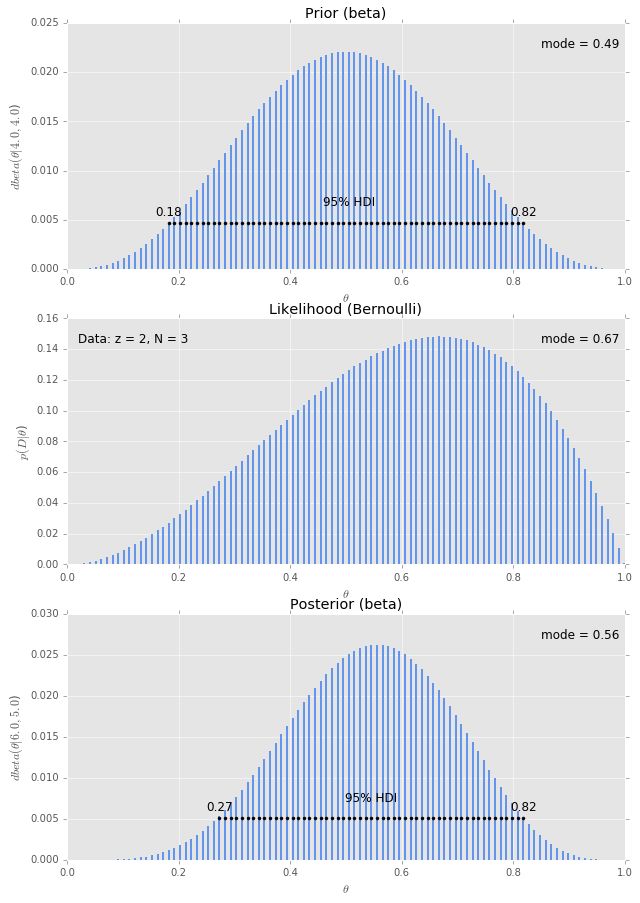

In [7]:
a = 4; b = 4

post = BernBeta(priorBetaAB=[a,b], Data=[0,1,1])

## Exercise 6.2

**Purpose**: Connecting HDIs to the real world, with iterative data collection.

### Part A

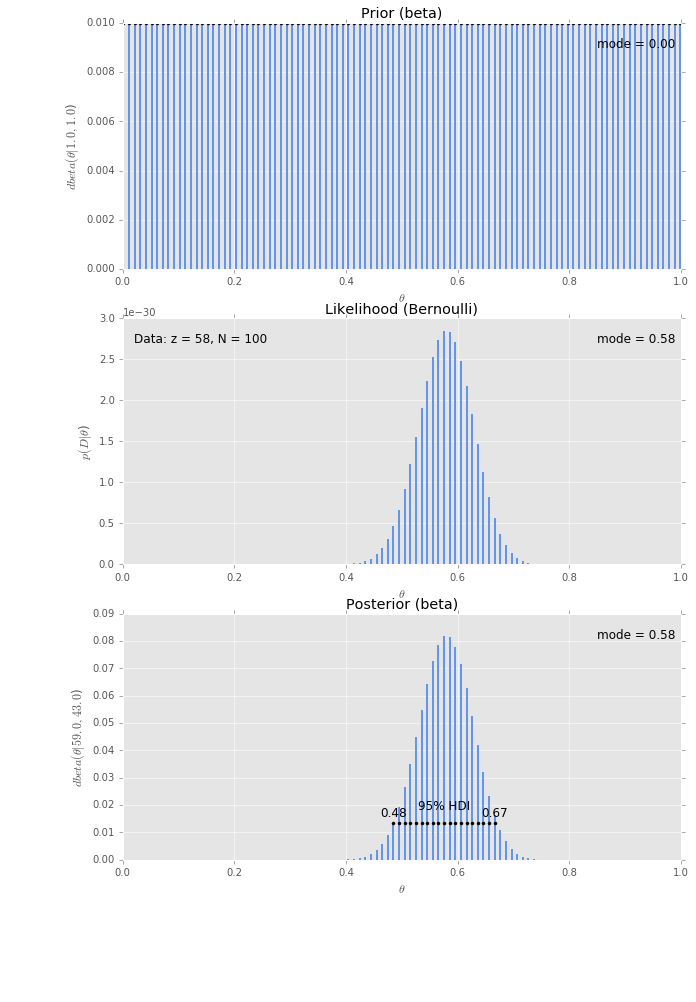

In [8]:
a = 1; b = 1
N = 100
z = 58
Data = np.concatenate((np.repeat(0,N-z), np.repeat(1,z)))

post = BernBeta(priorBetaAB=[a,b], Data=Data, HDImass=0.95)

### Part B

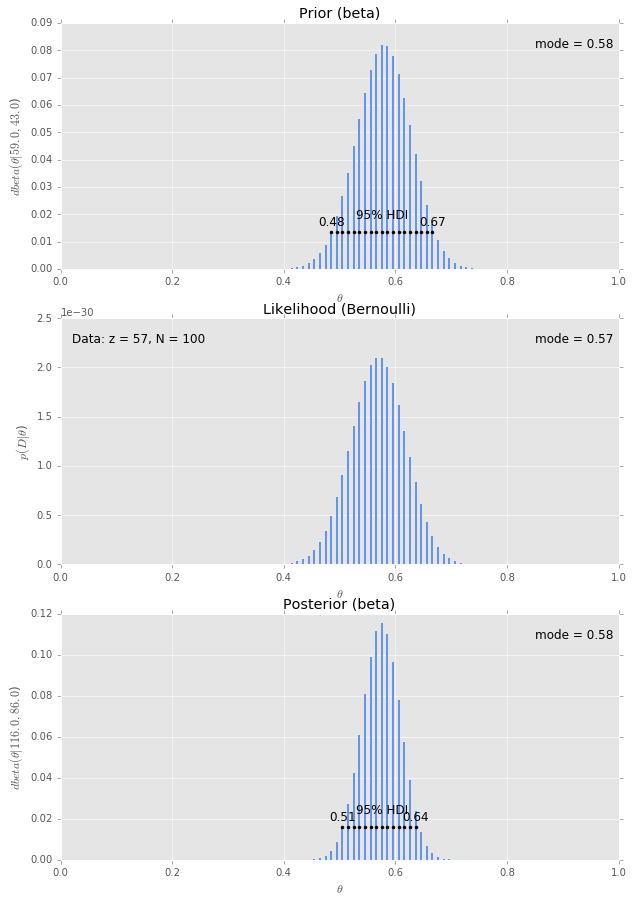

In [9]:
N = 100
z = 57
Data = np.concatenate((np.repeat(0,N-z), np.repeat(1,z)))

post = BernBeta(priorBetaAB=post, Data=Data, HDImass=0.95)

## Exercise 6.3

**Purpose**: Apply the Bayesian method to real data analysis. These data are representative of real data (Kruschke, 2009).

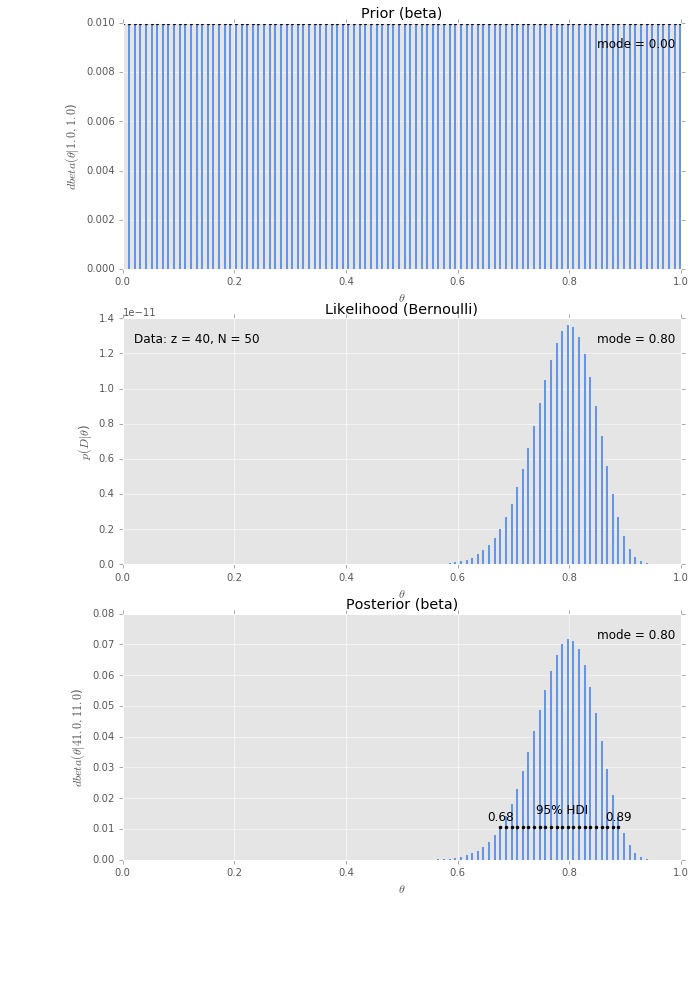

In [10]:
# test 1
n_radio_f = 40
n_radio_j = 10

Data = np.concatenate((np.repeat(0,n_radio_j), np.repeat(1,n_radio_f)))
post = BernBeta(priorBetaAB=[1,1], Data=Data, HDImass=0.95)

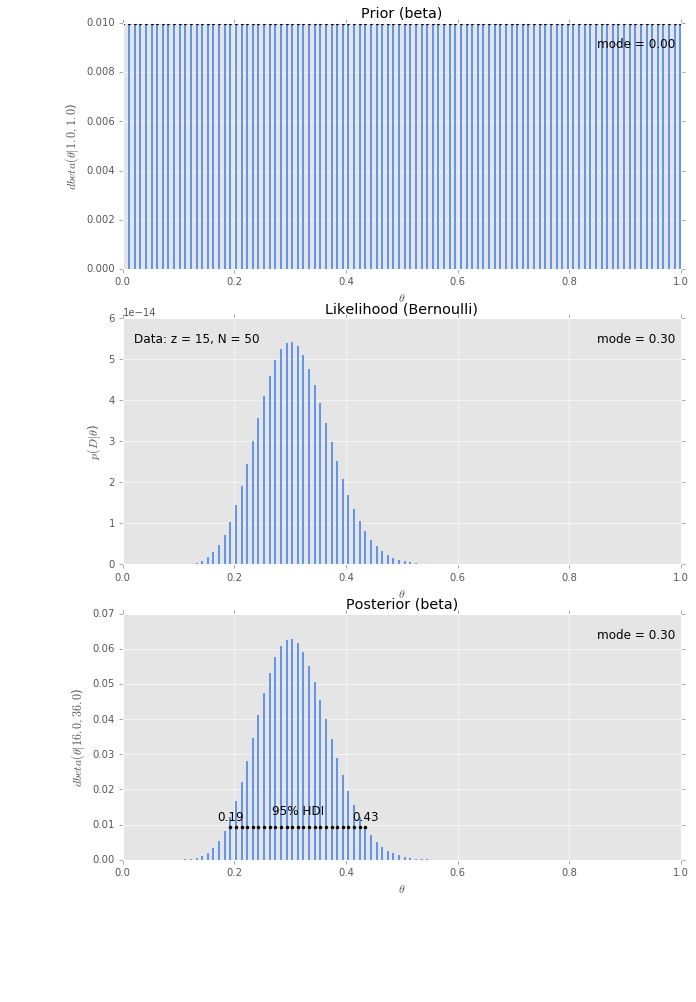

In [11]:
# test 2
n_ocean_mountain_f = 15
n_ocean_mountain_j = 35
Data = np.concatenate((np.repeat(0,n_ocean_mountain_j), np.repeat(1,n_ocean_mountain_f)))
post = BernBeta(priorBetaAB=[1,1], Data=Data, HDImass=0.95)

## Exercise 6.4

**Purpose**: To explore an unusual prior and learn about the beta distribution in the process.

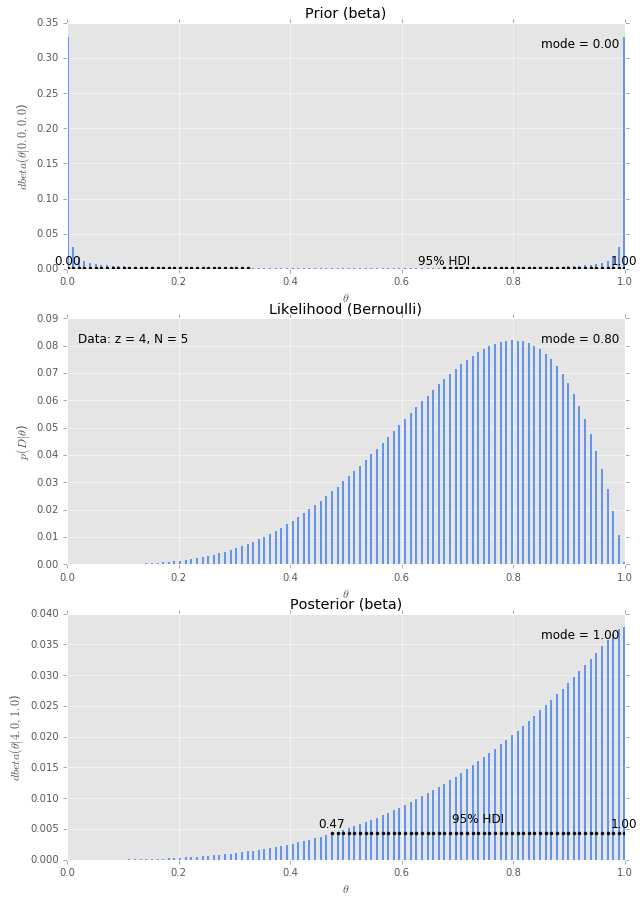

In [12]:
Data = [1,1,1,1,0]
post = BernBeta(priorBetaAB=[.01,.01], Data=Data, HDImass=0.95)

## Exercise 6.5

**Purpose**: To get hands on experience with the goal of predicting the next datum, and to see how the prior influences that prediction.

### Part A

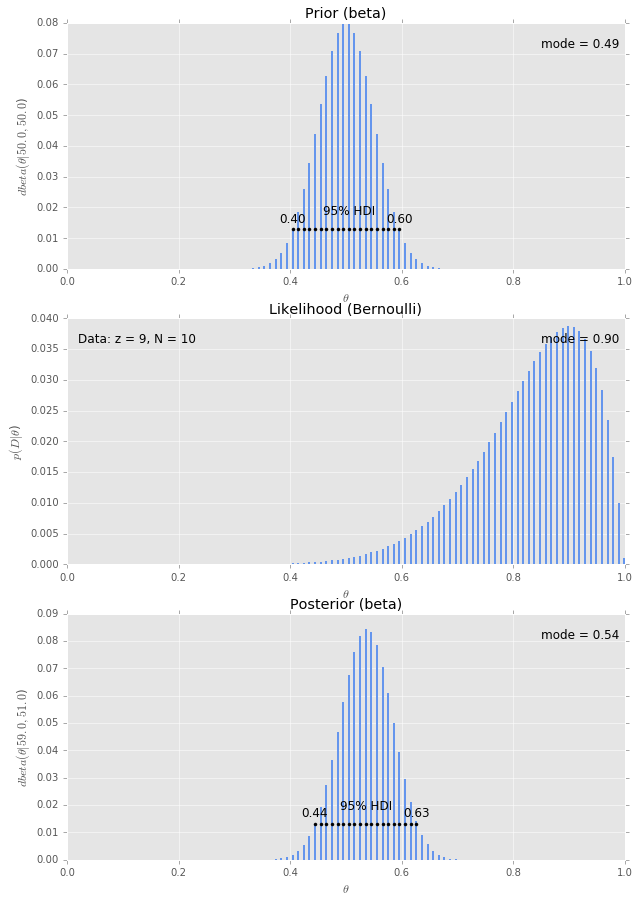

In [13]:
Prior = [50, 50]
Data = np.concatenate((np.repeat(0,1), np.repeat(1,9)))
post = BernBeta(priorBetaAB=Prior, Data=Data, HDImass=0.95)

In [14]:
Theta = np.linspace(0.001, 0.999, num=1000)
pThetaGivenData = betad.pdf(Theta, post[0], post[1])
pThetaGivenData /= sum(pThetaGivenData)

sum(pThetaGivenData * Theta) # p(heads | Prior, Data)

0.53636363636363571

### Part B

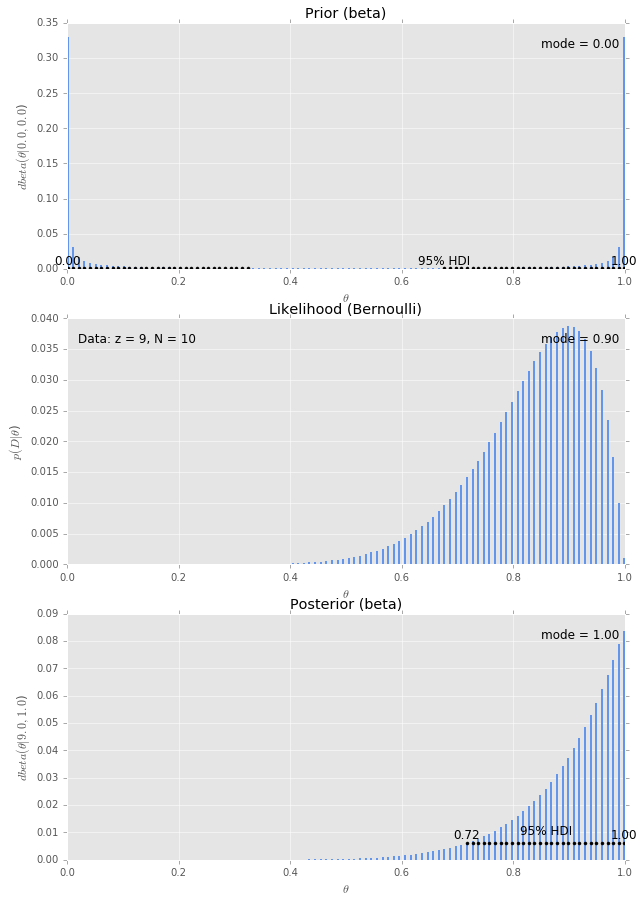

In [15]:
Prior = [0.01, 0.01]
Data = np.concatenate((np.repeat(0,1), np.repeat(1,9)))
post = BernBeta(priorBetaAB=Prior, Data=Data, HDImass=0.95)

In [16]:
Theta = np.linspace(0.001, 0.999, num=1000)
pThetaGivenData = betad.pdf(Theta, post[0], post[1])
pThetaGivenData /= sum(pThetaGivenData)

sum(pThetaGivenData * Theta) # p(heads | Prior, Data)

0.89877262932859459